Python has prefix & infix operators that are used by the Arithmetic, logical, comparison and bitwise operators.

& = Bitwise AND  : equ a x b

| = Bitwise OR   : equ a + b - (a x b)

^ = Bitwise XOR  : equ (a + b) mod 2

~ = Bitwise NOT  : equ 1 - a 

<< n = Bitwise left shift : equ a * 2^n

\>> n = Bitwise right shift  : equ a / 2^n 

This has to do with how Python represents integers internally. Since integers in Python can have an infinite number of bits, the sign bit doesn’t have a fixed position. In fact, there’s no sign bit at all in Python

Compound assignment operators

&= : Bitwise AND

|= : Bitwise OR 

^= : Bitwise XOR 

<<= : Bitwise left shift 

\>>= : Bitwise right shift 

####  Now understand where they’re most useful and how you can use them

Among many systems that can be used for representing numbers, flexible and modern option is positional notation.

A **notable feature** of any positional system is its base, which represents the number of digits available. People naturally favor the base-ten numeral system, also known as the decimal system, because it plays nicely with counting on fingers.

b'101 is different from 101. b'101 is 5 in base10 system. Need to number of 1s and multiple of 2s go into a 

They grow right to left, starting at the least-significant bit, which determines if the number is even or odd.

How computers use Binary

You could assign an arbitrary number to each character or pick an existing character encoding such as ASCII, ISO-8859-1, or UTF-8.

In [3]:
x = [ord(h) for h in 'Euro']
x  # shown in decimal format

[69, 117, 114, 111]

In [4]:
(56).bit_count()

3

In [5]:
# t bit-length, which is the number of binary digits, varies greatly across
# the characters. The euro sign (€) requires fourteen bits, while the rest 
# of the characters can comfortably fit on seven bits.

(56).bit_length()  # there is 6 bytes in this

6

In [6]:
len("⁅125")

4

In [7]:
"⁅125".encode("utf-8")
# 1, 2 and 5 occupy 1-byte each, while symbol takes 3 bytes

b'\xe2\x81\x85125'

In [8]:
# Evaluate Boolean expressions with bitwise operators
# instead of logical operators,
age = 12
is_self_excluded = True

age >= (18 & ~ is_self_excluded)

# The expression made of the bitwise operators evaluates to True, while the 
# same expression built from the logical operators evaluates to False.

False

In [9]:
(age >= 18) & ~is_self_excluded  # bitwise operators returns 0 / 1 numbers

0

In [10]:
# example of lazy evaluation
def call(x):
    print(f"call({x=})")
    return x

x0 = call(False) or call(True)  # Both operands evaluated

y = call(True) or call(False)  # Only the left operand evaluated


call(x=False)
call(x=True)
call(x=True)


In [11]:
call(True) | call(False)

call(x=True)
call(x=False)


True

In [13]:
# Bitwise AND  is an intersection of the operator’s arguments

ord('a') & ord('b')


96

In [20]:
print(bin(156))
print(bin(52))  # shorter ones padded with 0 on left

0b10011100
0b110100


In [15]:
# Bitwise AND  is an intersection of the operator’s arguments
# Arithmetically, this is equivalent to a product of two bit values

156 & 52  # 1


20

In [22]:
a = 52
a &= 156
a

20

In [21]:
# Bitwise OR is an union of the operator’s arguments
# Arithmetically, this is equivalent to sum & product of the bit values

156 | 52  # (156 + 52) - 156 X 52 

188

In [23]:
### Logical XoR operator
# Its exclusive-or as it performs exclusive disjunction 
def xor(a, b):
    return (a and not b) or (not a and b)

156 ^ 52  # Arithmetically (156 + 52) mod 2

168

In [24]:
# Bitwise Not performs logical negation
~156  # Artithmetically it is 1 - 156 

-157

In [25]:
~156 & 255

99

Although there are ways to simulate unsigned integers, Python doesn’t support them natively

In [32]:
bin(3)

'0b11'

In [34]:
3 << 1  # left shift operator adds a 0 to left

6

In [36]:
bin(3 << 1)

# The left shift used to be a popular optimization technique because bit
# shifting is a single instruction and is cheaper to calculate than exponent
# or product. 

'0b110'

In [37]:
39 << 3 

312

In [38]:
# chopping of to 8 bit using bit mask 
(39 << 3) & 255

56

In [39]:
3 >> 1

1

In [44]:
157 >> 2  # automatically floor the result

39

In [45]:
157 // 4 # right shift is floor division by 2 ^ n

# However, the floor division lets you choose any divisor
# and not just a power of two

39

In [46]:
157 / 4

39.25

You can further categorize the bitwise shift operators as arithmetic and logical shift operators. While Python only lets you do the arithmetic shift, it’s worthwhile to know how other programming languages implement the bitwise shift operators to avoid confusion and surprises.

A turned-on sign bit indicates negative numbers, which helps keep the arithmetic properties of a binary sequence

A **logical right shift**, also known as an unsigned right shift or a zero-fill right shift, moves the entire binary sequence, including the sign bit, and fills the resulting gap on the left with zeros

Since bit sequences in Python aren’t fixed in length, they don’t really have a sign bit. Moreover, they don’t use the traditional two’s complement representation like in C or Java. To mitigate that, you can take advantage of the modulo operation, which will keep the original bit patterns for positive integers while appropriately wrapping around the negative ones.

Since python there isn't fixed length for the integers, there is no fear of overflow, which is the case in C / Java

In [48]:
from ctypes import c_uint8 as unsigned_byte

unsigned_byte(-32).value  # interprets the - sign as part of the integer

224

In [49]:
f"{-5 & 0b1111:04b}"

'1011'

In **one’s complement**, positive numbers are the same as in sign-magnitude, but negative numbers are obtained by flipping the positive number’s bits using a bitwise NOT

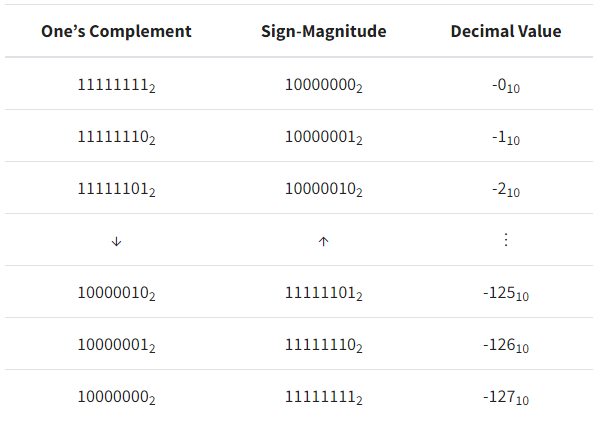

In [51]:
# that is wierd, as result is not 0
bin(1) + bin(-1)

'0b1-0b1'

In [52]:
bin(-1)

'-0b1'

In [59]:
# converting binary to integer 
int('-0b1111111', 2)

-127

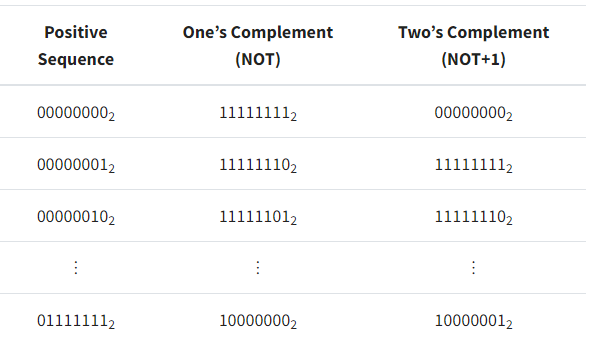

The range of available values in two’s complement becomes asymmetrical, with a lower bound that’s a power of two and an odd upper bound. For example, an 8-bit signed integer will let you store numbers from -12810 to 12710 in two’s complement:

### Twos complement in action

How negative numbers are two's complement

Negative numbers are treated as two’s complement bit sequences when you apply the bitwise operators on them, even though the result will be presented to you in sign-magnitude form.

In [60]:
bin(1)  # equal to 00000001 

'0b1'

In [62]:
~1  # equal to 10000000 = - 2 

-2

In [63]:
~1 + 1  # equal to 11111111 = -1  as 2's complement 

-1

IEEE 754 standard defines a binary representation for real numbers consisting of the sign, exponent, and mantissa bits

Two data types conforming to that standard are widely supported:

- Single precision: 1 sign bit, 8 exponent bits, 23 mantissa bits

- Double precision: 1 sign bit, 11 exponent bits, 52 mantissa bits

In [64]:
from decimal import Decimal, localcontext
# there is fractions module also
with localcontext() as context:
    context.prec = 5  # Number of digits
    print(Decimal("123.456") * 1)

123.46


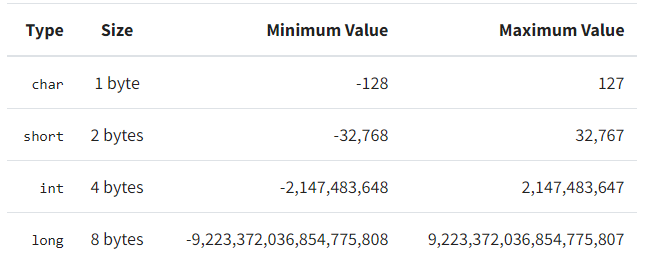

In [65]:
a = 256
b = 256
a is b

print(id(a), id(b), sep="\n")

140706260714248
140706260714248


In [66]:
a = 257
b = 257
a is b

print(id(a), id(b), sep="\n")

2470130535856
2470130536176


In [67]:
import sys
sys.maxsize

9223372036854775807

In [69]:
from math import factorial
factorial(42).bit_length()

170

In [70]:
sys.int_info

sys.int_info(bits_per_digit=30, sizeof_digit=4, default_max_str_digits=4300, str_digits_check_threshold=640)

#### Conversting decimal to binary

In [76]:
f"{32:08b}"

'00100000'

In [85]:
f"{8:08b}"

'00001000'

This global built-in function returns a string consisting of a binary literal, which starts with the prefix 0b and is followed by ones and zeros. It always shows the minimum number of digits without the leading zeros.

### Emulating the Sign Bit

When you call bin() on a negative integer, it merely prepends the minus sign to the bit string obtained from the corresponding positive value:

In [86]:
print(bin(-42), bin(42), sep="\n ")

-0b101010
 0b101010


In [90]:
# masking forces python to change representation to 2's complement & back again.
mask = 0b11111111

bin(-42 & mask)

'0b11010110'

In [89]:
bin(-42 % (1 << 8))

'0b11010110'

In [91]:
from ctypes import c_uint8 as unsigned_byte
bin(unsigned_byte(-42).value)

'0b11010110'

A single floating-point number in Python occupies as many as eight bytes in memory.

How do you see those bytes?

**You can’t simply use bitwise operators** because they don’t work with floating-point

In [92]:
3.14 & 0b11111111
# think of it in terms of a generic stream of bytes.

TypeError: unsupported operand type(s) for &: 'float' and 'int'

In [93]:
from struct import pack
# They won’t make sense until you get to the byte order section below. 
pack(">d", 3.14159)

b'@\t!\xf9\xf0\x1b\x86n'

In [94]:
list(b'@\t!\xf9\xf0\x1b\x86n')

[64, 9, 33, 249, 240, 27, 134, 110]

In [95]:
from struct import unpack
bits = "0100000000001001001000011111100111110000000110111000011001101110"
unpack(
  ">d",
  bytes(int(bits[i:i+8], 2) for i in range(0, len(bits), 8))
)

(3.14159,)

Byte Order:

You’ll always find the least-significant bit at index zero and the most-significant bit at index seven, regardless of how they’re physically laid out in memory. The bitwise shift operators rely on this consistency.

different computer architectures use different approaches, which makes transferring data between them challenging.

### Introducing Endians

Lil Left and Big Right

In [96]:
# looking at 1969 in binary
f"{1969:032b}"

'00000000000000000000011110110001'

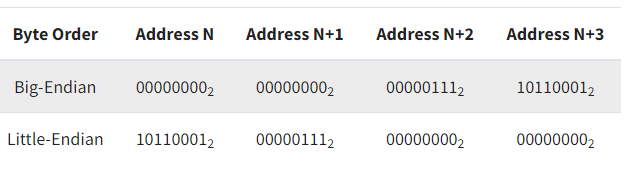

In [98]:
# one has to understand the big and lil else bad things happen

raw_bytes = (1969).to_bytes(length=4, byteorder="big")

print(int.from_bytes(raw_bytes, byteorder="little"))

print(int.from_bytes(raw_bytes, byteorder="big"))

2970025984
1969


In [99]:
sys.byteorder

'little'

In [100]:
big_endian = b"\x00\x00\x07\xb1"
bytes(reversed(big_endian))

b'\xb1\x07\x00\x00'

Network protocol and endianess

In [102]:
from socket import htons, htonl, ntohs, ntohl
print(htons(1969))  # Host to network (short int)

print(htonl(1969))  # Host to network (long int)

print(ntohs(45319))  # Network to host (short int)

print(ntohl(2970025984))  # Network to host (long int)

45319
2970025984
1969
1969


### Bitmasking

Bitmasking involves both the bitwise logical operators and the bitwise shift operators that you’ve read about.

In [105]:
1 << 8

256

In [106]:
def get_bit(value, bit_idx):
    return value & (1 << bit_idx)
    # read value of bit at a idtx

get_bit(0b10000000, bit_idx=5)

0

In [107]:
get_bit(0b10100000, bit_idx=5)

32

In [111]:
int('0b10000000', 2)

128

In [109]:
def set_bit(value, bit_index):
    return value | (1 << bit_index)
    # set the value
print(set_bit(0b10000000, bit_index=5))

bin(160)

160


'0b10100000'

In [112]:
def clear_bit(value, bit_index):
    return value & ~(1 << bit_index)
    # unset or remove a bit
clear_bit(0b11111111, bit_index=5)

bin(223)

'0b11011111'

In [113]:
def toggle_bit(value, bit_index):
    return value ^ (1 << bit_index)
    # toggle a bit

x = 0b10100000
for _ in range(5):
    x = toggle_bit(x, bit_index=7)
    print(bin(x))

0b100000
0b10100000
0b100000
0b10100000
0b100000


It’s not a widely known fact, but bitwise operators can perform operations from set algebra, such as union, intersection, and symmetric difference, as well as merge and update dictionaries.

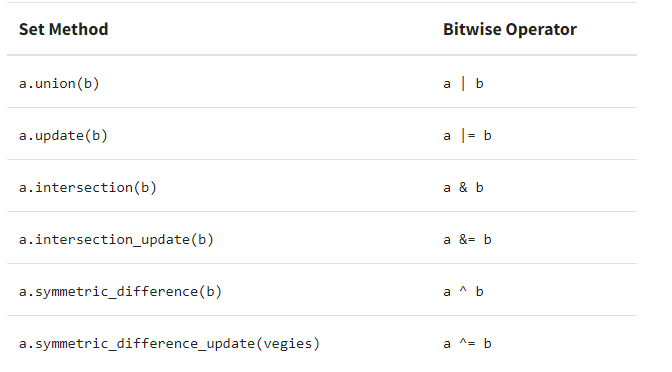

In [114]:
fruits = {"apple", "banana", "tomato"}

veggies = {"eggplant", "tomato"}

print(fruits | veggies)

print(fruits & veggies)

print(fruits ^ veggies)

print(fruits - veggies)  # Not a bitwise operator!

{'tomato', 'banana', 'eggplant', 'apple'}
{'tomato'}
{'apple', 'banana', 'eggplant'}
{'banana', 'apple'}


In [117]:
fruits = {"apples": 2, "bananas": 5, "tomatoes": 0}
veggies = {"eggplants": 2, "tomatoes": 4}
print(fruits | veggies)  # Python 3.9+

fruits |= veggies  # Python 3.9+, same as fruits.update(veggies)

{'apples': 2, 'bananas': 5, 'tomatoes': 4, 'eggplants': 2}


In [118]:
from struct import unpack

with open("example.bmp", "rb") as file_object:
    file_object.seek(0x22)
    field: bytes = file_object.read(4)
    value: int = unpack("<I", field)[0]

In [119]:
print(field)

b'\x00{\x0c\x00'


In [120]:
print(value)

817920


Bitmaps store pixel rows upside down, starting from the bottom rather than the top. Also, every pixel is serialized to a vector of color channels in a somewhat odd BGR order rather than RGB.

In [ ]:
@reserved_field.setter
def reserved_field(self, value: int) -> None:
    """Store a little-endian 32-bit unsigned integer."""
    self._file_bytes.seek(0x06)
    self._file_bytes.write(pack("<I", value))

In [122]:
from pathlib import Path
path = Path("/home/jsmith/café.pdf")
path.name.encode("utf-8") + b"\x00"

b'caf\xc3\xa9.pdf\x00'